In [129]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [130]:
df = pd.read_csv('Flight_Price_Dataset_Q2.csv')
df

,departure_time,stops,arrival_time,class,duration,days_left,price
0,Evening,zero,Night,Economy,2.17,1,5953
1,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,Morning,zero,Afternoon,Economy,2.25,1,5955
4,Morning,zero,Morning,Economy,2.33,1,5955
...,...,...,...,...,...,...,...
270133,Early_Morning,one,Night,Business,17.25,49,68739
270134,Morning,one,Evening,Business,10.08,49,69265
270135,Afternoon,one,Night,Business,10.42,49,77105
270136,Early_Morning,one,Evening,Business,10.00,49,81585


In [131]:
df['stops'].value_counts()

stops
one            225767
zero            32466
two_or_more     11905
Name: count, dtype: int64

In [132]:
df['departure_time'].value_counts()

departure_time
Morning          64036
Early_Morning    60112
Evening          58586
Night            43267
Afternoon        42951
Late_Night        1186
Name: count, dtype: int64

In [133]:
df['arrival_time'].value_counts()

arrival_time
Night            82413
Evening          70494
Morning          56438
Afternoon        34274
Early_Morning    13889
Late_Night       12630
Name: count, dtype: int64

In [134]:
df['class'].value_counts()

class
Economy     185998
Business     84140
Name: count, dtype: int64

In [135]:
df = pd.get_dummies(df, columns=['class'], drop_first=True)
df

,departure_time,stops,arrival_time,duration,days_left,price,class_Economy
0,Evening,zero,Night,2.17,1,5953,True
1,Early_Morning,zero,Morning,2.33,1,5953,True
2,Early_Morning,zero,Early_Morning,2.17,1,5956,True
3,Morning,zero,Afternoon,2.25,1,5955,True
4,Morning,zero,Morning,2.33,1,5955,True
...,...,...,...,...,...,...,...
270133,Early_Morning,one,Night,17.25,49,68739,False
270134,Morning,one,Evening,10.08,49,69265,False
270135,Afternoon,one,Night,10.42,49,77105,False
270136,Early_Morning,one,Evening,10.00,49,81585,False


In [136]:
mapping = {'Early_Morning': 0,
           'Morning' : 1,
           'Afternoon' : 2,
           'Evening' : 3,
          'Night': 4,
          'Late_Night': 5}

df['arrival_time_encode'] = df['arrival_time'].map(mapping)
df['departure_time_encode'] = df['departure_time'].map(mapping)
df = df.drop('arrival_time', axis=1)
df = df.drop('departure_time', axis = 1)

df

,stops,duration,days_left,price,class_Economy,arrival_time_encode,departure_time_encode
0,zero,2.17,1,5953,True,4,3
1,zero,2.33,1,5953,True,1,0
2,zero,2.17,1,5956,True,0,0
3,zero,2.25,1,5955,True,2,1
4,zero,2.33,1,5955,True,1,1
...,...,...,...,...,...,...,...
270133,one,17.25,49,68739,False,4,0
270134,one,10.08,49,69265,False,3,1
270135,one,10.42,49,77105,False,4,2
270136,one,10.00,49,81585,False,3,0


In [137]:
mapping = {'zero': 0,
           'one' : 1,
           'two_or_more' : 2}

df['stops_encode'] = df['stops'].map(mapping)
df = df.drop('stops', axis = 1)
df

,duration,days_left,price,class_Economy,arrival_time_encode,departure_time_encode,stops_encode
0,2.17,1,5953,True,4,3,0
1,2.33,1,5953,True,1,0,0
2,2.17,1,5956,True,0,0,0
3,2.25,1,5955,True,2,1,0
4,2.33,1,5955,True,1,1,0
...,...,...,...,...,...,...,...
270133,17.25,49,68739,False,4,0,1
270134,10.08,49,69265,False,3,1,1
270135,10.42,49,77105,False,4,2,1
270136,10.00,49,81585,False,3,0,1


In [138]:
df.corr()

,duration,days_left,price,class_Economy,arrival_time_encode,departure_time_encode,stops_encode
duration,1.000000,-0.039288,0.204198,-0.138937,-0.124206,0.131420,0.468928
days_left,-0.039288,1.000000,-0.091091,0.012238,0.000499,0.000081,-0.009128
price,0.204198,-0.091091,1.000000,-0.937923,-0.000813,0.019681,0.120344
class_Economy,-0.138937,0.012238,-0.937923,1.000000,0.022188,-0.029657,-0.001790
arrival_time_encode,-0.124206,0.000499,-0.000813,0.022188,1.000000,-0.079846,0.045254
departure_time_encode,0.131420,0.000081,0.019681,-0.029657,-0.079846,1.000000,-0.070057
stops_encode,0.468928,-0.009128,0.120344,-0.001790,0.045254,-0.070057,1.000000


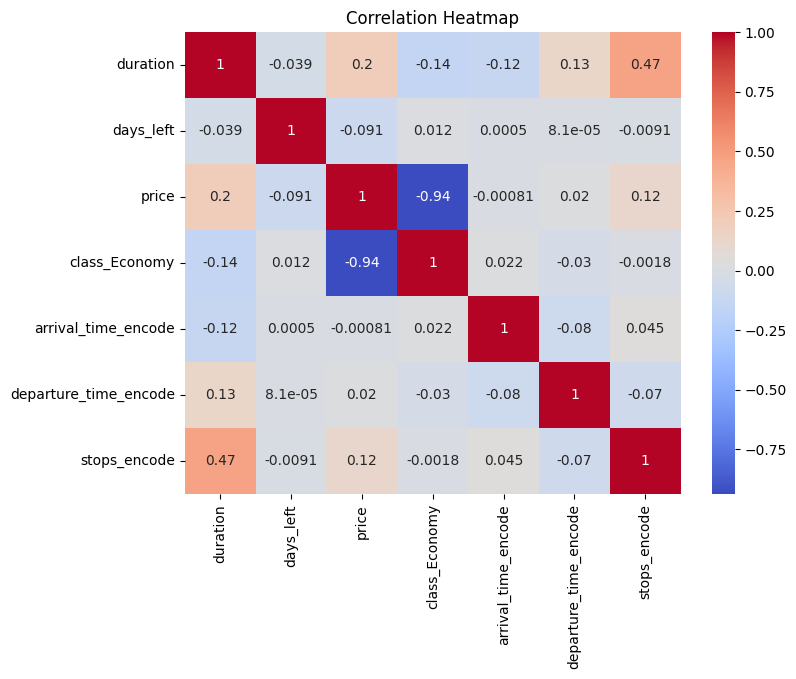

In [139]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [140]:
X_df = df.drop(columns=['price'])
y_df = df['price']

In [141]:
X_df['class_Economy'] = X_df['class_Economy'].astype(int)
X_df

,duration,days_left,class_Economy,arrival_time_encode,departure_time_encode,stops_encode
0,2.17,1,1,4,3,0
1,2.33,1,1,1,0,0
2,2.17,1,1,0,0,0
3,2.25,1,1,2,1,0
4,2.33,1,1,1,1,0
...,...,...,...,...,...,...
270133,17.25,49,0,4,0,1
270134,10.08,49,0,3,1,1
270135,10.42,49,0,4,2,1
270136,10.00,49,0,3,0,1


In [150]:
x_train, x_test , y_train , y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=4, shuffle=True)

In [151]:
X = x_train.to_numpy()
y = y_train.to_numpy()
y = y.reshape(-1, 1)

In [152]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

In [153]:
def cost_function(y_hat, y):
    return np.mean((y_pred - y_true)**2)

In [154]:
def predict(W, X, b):
    return X @ W + b

In [155]:
def model(X, y, max_itr):
    n = X.shape[1]
    W = np.random.rand(n, 1)
    b = 0
    alpha = 0.01
    
    for i in range(max_itr):
        W, b, error = gradient_descent(X, y, W, b, alpha)
        print(np.mean(error**2))
        
    return W, b

In [156]:
def gradient_descent(X, y, W, b, alpha):
    n = X.shape[1]
    m = X.shape[0]
    
    error = predict(W, X, b) - y
    dW = 2 * X.T @ error / X.shape[0]
    db = 2 * np.mean(error)
    
    W -= alpha * dW
    b -= alpha * db
    
    return W, b, error

In [157]:
W, b = model(X, y, 300)

952703456.58243
916133814.9357375
881077015.8747579
847468992.2054026
815248469.6702288
784356840.877683
754738045.1515442
726338454.0107262
699106762.0043579
672993882.6410705
647952849.1646764
623938719.9409871
600908488.2324115
578820996.1482548
557636852.5693258
537318354.8555719
517829414.1550675
499135484.141777
481203493.01812375
464001778.62658525
447500026.52227366
431669210.86581457
416481538.00280607
401910392.6027511
387930286.23662096
374516808.2781666
361646579.0197238
349297204.89862627
337447235.73541206
326076123.88983846
315164185.24529135
304692561.936527
294643186.7398023
284998749.04837173
275742662.36004555
266859033.20703724
258332631.46167964
250148861.95478132
242293737.34641606
234753852.19181845
227516358.1477882
220568940.26760706
213899794.33493525
207497605.1895041
201351525.99965113
195451158.4388631
189786533.72550872
184348094.48686156
179126677.41033417
174113496.6465819
169300127.9307804
164678493.38995475
160240847.00572735
155979760.70327535
1518881

In [125]:
y_pred = predict(W, x_test, b)

In [126]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9006342295423686
MAE: 4587.382252963752
MSE: 51010998.844046034
RMSE: 7142.19846014139


In [127]:
y_pred = predict(W, X, b)

In [128]:
print('R^2:',metrics.r2_score(y, y_pred))
print('MAE:',metrics.mean_absolute_error(y, y_pred))
print('MSE:',metrics.mean_squared_error(y, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y, y_pred)))

R^2: 0.899428040315619
MAE: 4622.154696515446
MSE: 51855050.887392886
RMSE: 7201.0451246602315
